In [1]:
# !pip install diagrams
# !pip install cairosvg

# !brew install graphviz

# svg2png

In [2]:
import os
import cairosvg

directory = './icon/svg'
directory_dist = './icon/png'
files = os.listdir(directory)

for file in files:
    if file.endswith('.svg'):
        svg_path = os.path.join(directory, file)
        png_path = os.path.join(directory_dist, file.replace('.svg', '.png'))
        cairosvg.svg2png(url=svg_path, write_to=png_path)

## 架構圖

In [3]:
from diagrams import Diagram, Cluster

In [4]:
from diagrams.onprem.client import Users
# NetWork
from diagrams.saas.cdn import Cloudflare
from diagrams.onprem.network import Nginx
from diagrams.onprem.network import Traefik
# BackEnd
from diagrams.programming.framework import Django
# 
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.database import MongoDB
from diagrams.onprem.inmemory import Redis

# 
from diagrams.onprem.container import Docker
from diagrams.onprem.vcs import Github

In [5]:
from diagrams.custom import Custom
icon = lambda name: f"./icon/png/{name}.png"

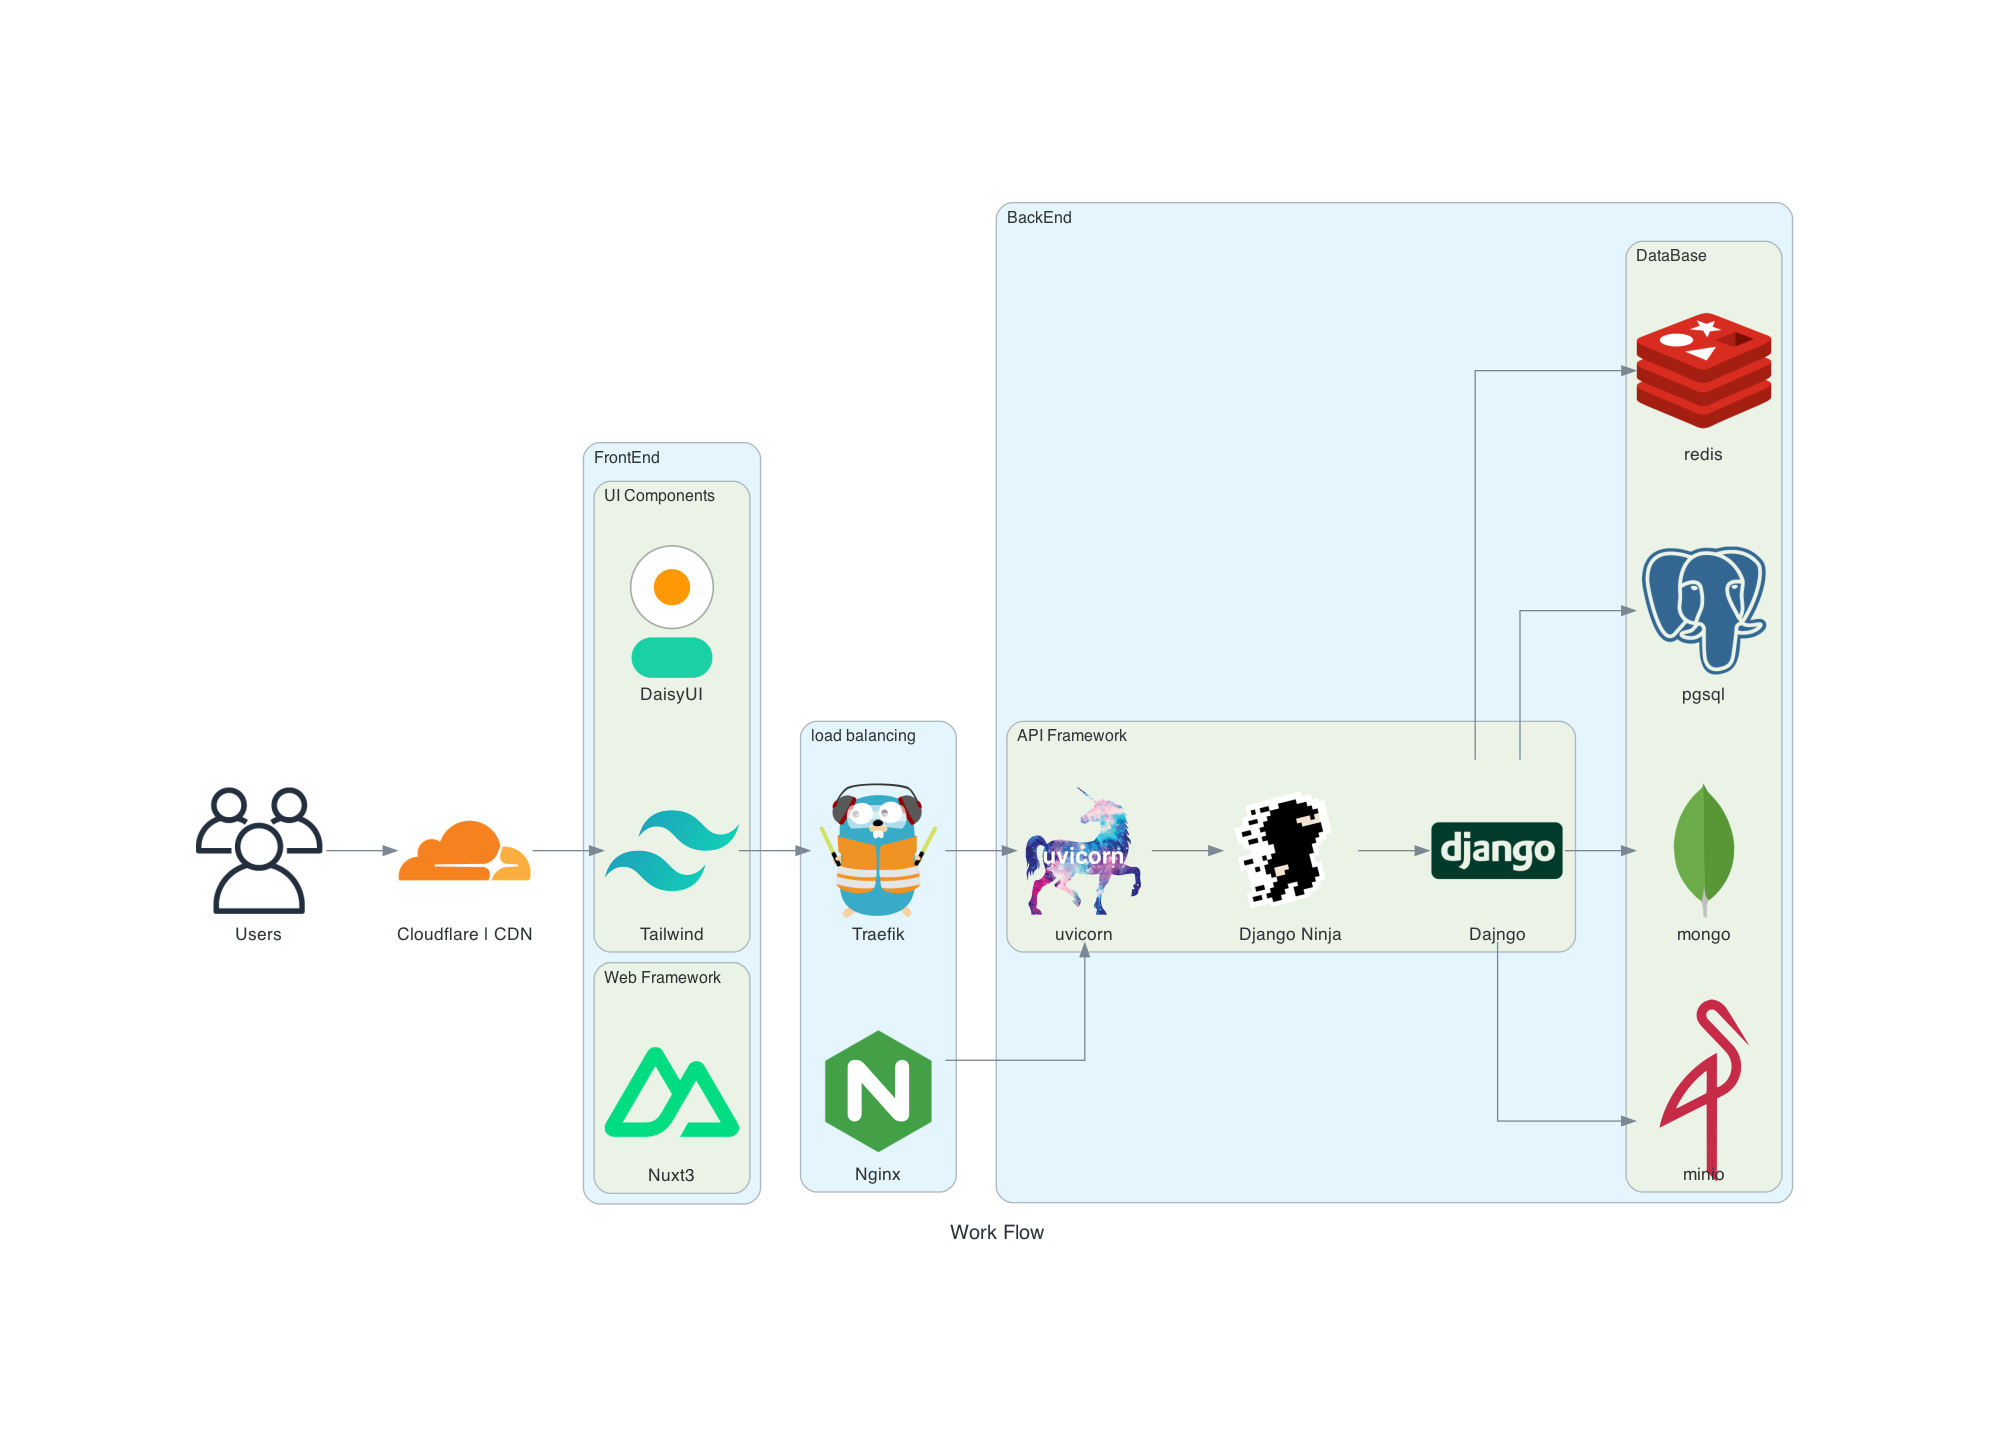

In [6]:
with Diagram("Work Flow", show=False, filename="MainWorkFlow", direction="LR", outformat='png') as diag:
    # Work Flow
    users = Users('Users')
    cloudflare = Cloudflare('Cloudflare | CDN')

    with Cluster("FrontEnd") as frontend:
        with Cluster("Web Framework"):
            nuxt3 = Custom("Nuxt3", icon("nuxt3"))

        with Cluster("UI Components"):
            Tailwind = Custom("Tailwind", icon("tailwindcss"))
            daisyUI = Custom("DaisyUI", icon("daisyui"))

    with Cluster("load balancing"):
        nginx = Nginx('Nginx')
        traefik = Traefik('Traefik')

    with Cluster("BackEnd") as BackEnd:
        with Cluster("API Framework"):
            uvicorn = Custom('uvicorn', icon('uvicorn'))
            djangoNinja = Custom("Django Ninja", icon("django-ninja"))
            django = Django('Dajngo')

        with Cluster("DataBase"):
            redis = Redis('redis')
            pgsql = PostgreSQL('pgsql')
            mongo = MongoDB('mongo')
            minio = Custom('minio', icon('minio'))

        [nginx, traefik] >> uvicorn >> djangoNinja >> django >> [minio, mongo, pgsql, redis]
    users >> cloudflare >> Tailwind >> traefik

diag

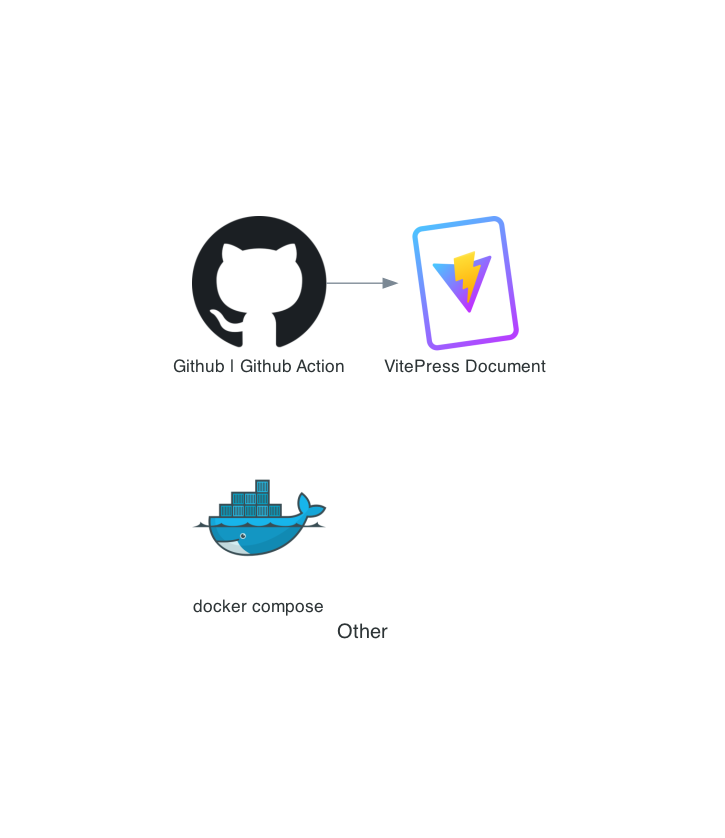

In [7]:
with Diagram("Other", show=False, filename="OtherWorkFlow", direction="LR", outformat='png') as diag:
    docker = Docker('docker compose')
    github = Github('Github | Github Action')
    vitepress = Custom('VitePress Document', icon('vitepress-logo-mini'))
    github >> vitepress
diag